<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%A1%D1%91%D1%80%D0%B5%D0%BD%D1%81%D0%B5%D0%BD_%D0%94%D0%B0%D0%B9%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install multiset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
from multiset import Multiset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def tokenizetext(txt):
    arr = []
    for wrd in txt:
        arr += [wrd]
    return Multiset(arr)


def sorenson_dice(text1, text2):
    ''' Sorenson-Dice similarity of Multisets '''
    bc1, bc2 = tokenizetext(text1), tokenizetext(text2)
    return 2 * len(bc1 & bc2) / (len(bc1) + len(bc2))

In [4]:
df = pd.read_csv('lemmas_levels.csv', sep=',')
df.index = np.arange(1, len(df) + 1)
mark1 = "1E"
mark2 = "2I"
mark3 = "3AU"
mark4 = "4S"
ll1 = df.query('level == @mark1')
ll2 = df.query('level == @mark2')
ll3 = df.query('level == @mark3')
ll4 = df.query('level == @mark4')

In [5]:
df = pd.read_csv('dictionary_csv.csv', sep=',')
df.index = np.arange(1, len(df) + 1)
dc1 = df[:1000]
dc2 = df[1000:2000]
dc3 = df[2000:3000]
dc4 = df[3000:4000]

In [6]:
data1 = dc1['lemma'].str.lower().append(dc1['lemma'].str.lower())
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.6666666666666666


In [7]:
len(data1)

2000

In [8]:
data1 = data1.append(dc1['lemma'].str.lower())
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.5


In [9]:
len(data1)

3000

In [10]:
data1 = data1.append(dc1['lemma'].str.lower())
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.4


In [11]:
data1 = ll1['lemma'].str.strip('\'')
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.43487321986800975


In [12]:
data1 = ll2['lemma'].str.strip('\'')
data2 = dc2['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.161055750067331


In [13]:
data1 = ll3['lemma'].str.strip('\'')
data2 = dc3['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.011102947179361581


In [14]:
data1 = ll4['lemma'].str.strip('\'')
data2 = dc4['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.008679023242130037


In [15]:
df = pd.read_csv('A1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A1 = df[:754]

In [16]:
data1 = ll1['lemma'].str.strip('\'')
data2 = A1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.4238511203949867


In [17]:
df = pd.read_csv('A2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A2 = df[:1048]

In [18]:
data1 = ll2['lemma'].str.strip('\'')
data2 = A2['Unnamed: 0'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.12390321722946025


In [19]:
df = pd.read_csv('B1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B1 = df[:1081]

In [20]:
data1 = ll3['lemma'].str.strip('\'')
data2 = B1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.008110300081103


In [21]:
df = pd.read_csv('B2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B2 = df[:3331]

In [22]:
data1 = ll4['lemma'].str.strip('\'')
data2 = B2['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.03403026307528097


In [23]:
data1 = dc1['lemma'].str.lower()
data2 = A1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.35347776510832385


In [24]:
data1 = dc2['lemma'].str.lower()
data2 = A2['Unnamed: 0'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.14453125


In [25]:
data1 = dc3['lemma'].str.lower()
data2 = B1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.12686208553580008


In [26]:
data1 = dc4['lemma'].str.lower()
data2 = B2['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.1353036250288617


In [27]:
columns=['Harvard (0)', 'Sharoff (1)', 'Twirll (2)']

data = [
[1, 0.43, 0.42],
[0.43, 1, 0.35],
[0.42, 0.35, 1]
]

df = pd.DataFrame(data, columns=columns)
df.to_csv(r'matrix.csv')

<AxesSubplot:>

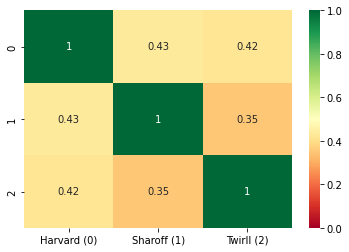

In [28]:
sns.heatmap(df, annot=True, vmin=0, vmax=1, cmap ='RdYlGn')

In [103]:
df = pd.read_csv('new_vocab_a1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv1 = df

In [104]:
len(df)

994

In [105]:
data1 = ll1['lemma'].str.strip('\'')
data2 = nv1['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.4949530107901149


In [107]:
df = pd.read_csv('new_vocab_a2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv2 = df

In [108]:
data1 = ll2['lemma'].str.strip('\'')
data2 = nv2['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.10842525228819526


In [109]:
df = pd.read_csv('new_vocab_b1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv3 = df

In [110]:
data1 = ll3['lemma'].str.strip('\'')
data2 = nv3['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.011079524746701654


In [111]:
df = pd.read_csv('new_vocab_b2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv4 = df

In [112]:
data1 = ll4['lemma'].str.strip('\'')
data2 = nv4['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.0333996903339969


In [113]:
data1 = dc1['lemma'].str.lower()
data2 = nv1['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.41624874623871616


In [114]:
data1 = nv1['а'].str.lower()
data2 = A1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.816933638443936


In [117]:
data1 = dc2['lemma'].str.lower()
data2 = nv2['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.21821036106750394


In [118]:
data1 = nv2['а'].str.lower()
data2 = A2['Unnamed: 0'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.5570107858243452


In [119]:
data1 = dc3['lemma'].str.lower()
data2 = nv3['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.16253602305475504


In [120]:
data1 = nv3['а'].str.lower()
data2 = B1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.5226696705153477


In [121]:
data1 = dc4['lemma'].str.lower()
data2 = nv4['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.16491985203452528


In [122]:
data1 = nv4['а'].str.lower()
data2 = B2['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.7189023698832067
